Rotation Strategy
=================

In [1]:
# If you would like to refresh your data, please execute the bellow codes.

import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt

from mypo import Loader

DOWNLOAD = False

if DOWNLOAD:
    tickers = pd.read_csv("/app/docs/tutorial/tickers.csv")
    loader = Loader()
    for row in tqdm(tickers.to_dict('record')):
        loader.get(row['Ticker'], expense_ratio=row['ExpenseRatio'] * 0.01)
    loader.save('/app/docs/tutorial/all.bin')

In [2]:
loader = Loader.load('/app/docs/tutorial/all.bin')
loader = loader.since(datetime(2007, 1, 1))
market = loader.get_market()

selected_tickers = ['SPY', 'EFA', 'GLD']

In [3]:
from mypo import split_k_folds
from mypo.optimizer import NoOptimizer, RotationStrategy
from mypo.rebalancer import MonthlyRebalancer
from mypo.evacuator import MovingAverageEvacuator
from mypo import Runner

folds = split_k_folds(market, 1, 200)
fold = folds[0].filter(selected_tickers)

Reference Performance (SPY)
----------------------------------------

100%|██████████| 3416/3416 [00:12<00:00, 279.42it/s]


           tickers  yearly total return  sharpe ratio  max draw down  \
0  [SPY, EFA, GLD]             1.081402      0.313455       0.452535   

   max draw down span  
0                1318  
              return       std  sharpe ratio  draw down
2007-12-31 -0.070048  0.203789     -0.441871   0.900611
2008-12-31 -0.342729  0.404963     -0.895710   0.495878
2009-12-31  0.230129  0.257868      0.814872   0.452535
2010-12-31  0.130888  0.171868      0.645192   0.685786
2011-12-31  0.017959  0.217142     -0.009400   0.749985
2012-12-31  0.153834  0.121414      1.102295   0.866846
2013-12-31  0.250756  0.101235      2.279415   0.947054
2014-12-31  0.129200  0.104288      1.047103   0.931672
2015-12-31 -0.005435  0.144072     -0.176542   0.889826
2016-12-31  0.125102  0.118920      0.883803   0.878241
2017-12-31  0.189369  0.062425      2.713175   0.975451
2018-12-31 -0.049852  0.153296     -0.455667   0.823208
2019-12-31  0.279925  0.112742      2.305479   0.853734
2020-12-31  0.133233  0

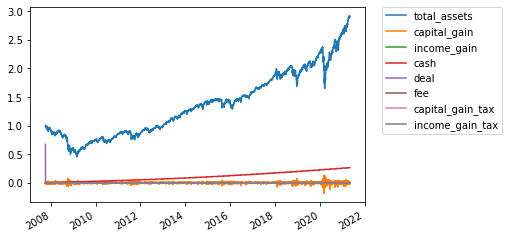

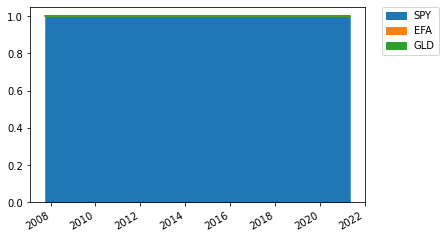

In [4]:
optimizer = NoOptimizer([1, 0, 0])
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
print(report.annual_summary())
ax = report.history().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


RotationStrategy
----------------------------------------

100%|██████████| 3416/3416 [00:12<00:00, 268.24it/s]


           tickers  yearly total return  sharpe ratio  max draw down  \
0  [SPY, EFA, GLD]             0.909788     -0.505314       0.187728   

   max draw down span  
0                3415  
              return       std  sharpe ratio  draw down
2007-12-31 -0.100559  0.229040     -0.526365   0.881695
2008-12-31 -0.491544  0.458861     -1.114814   0.372462
2009-12-31  0.170962  0.238494      0.632978   0.360543
2010-12-31 -0.130924  0.198401     -0.760702   0.397391
2011-12-31 -0.225155  0.256480     -0.955844   0.347718
2012-12-31  0.057298  0.152106      0.245209   0.338550
2013-12-31  0.002860  0.140972     -0.121586   0.370729
2014-12-31 -0.078172  0.134595     -0.729385   0.338084
2015-12-31 -0.179232  0.155981     -1.277277   0.276602
2016-12-31 -0.203691  0.187351     -1.193968   0.223883
2017-12-31  0.118931  0.088167      1.122084   0.231182
2018-12-31 -0.051896  0.135136     -0.532028   0.229060
2019-12-31  0.133415  0.129695      0.874473   0.244140
2020-12-31  0.000367  0

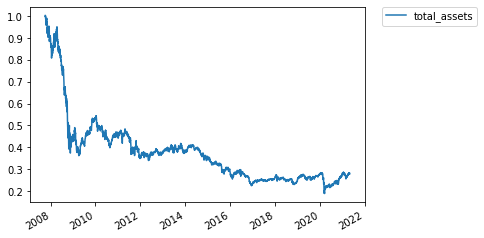

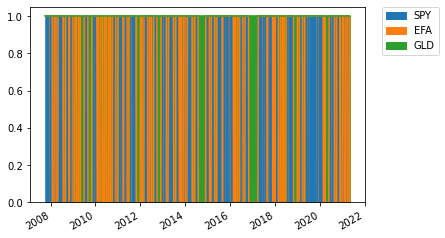

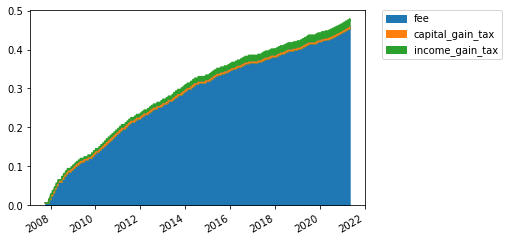

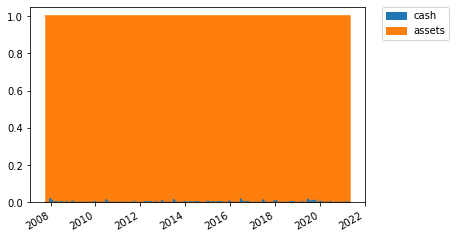

In [5]:
optimizer = RotationStrategy(risk_free_rate=0.02, do_re_optimize=True)
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
print(report.annual_summary())
ax = report.history_assets().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cost().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cash_vs_assets().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


RotationStrategy with cash filter
----------------------------------------

100%|██████████| 3416/3416 [00:23<00:00, 143.40it/s]


           tickers  yearly total return  sharpe ratio  max draw down  \
0  [SPY, EFA, GLD]             0.943948     -0.598128       0.334897   

   max draw down span  
0                2844  
              return       std  sharpe ratio  draw down
2007-12-31 -0.102259  0.151723     -0.805806   0.897741
2008-12-31 -0.074656  0.090083     -1.050764   0.830720
2009-12-31  0.307261  0.184841      1.554101   0.776971
2010-12-31 -0.152780  0.154158     -1.120795   0.738348
2011-12-31 -0.221795  0.150836     -1.603028   0.650800
2012-12-31 -0.007677  0.119845     -0.230942   0.598564
2013-12-31  0.045895  0.111262      0.232741   0.614272
2014-12-31 -0.021390  0.083544     -0.495425   0.634053
2015-12-31 -0.216041  0.093412     -2.526888   0.518193
2016-12-31 -0.202747  0.135651     -1.642056   0.413131
2017-12-31  0.025319  0.072948      0.072917   0.399464
2018-12-31 -0.098043  0.111663     -1.057134   0.368677
2019-12-31 -0.057554  0.117105     -0.662254   0.336782
2020-12-31  0.096227  0

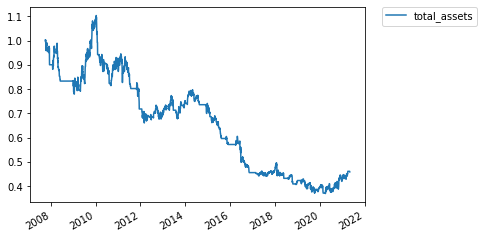

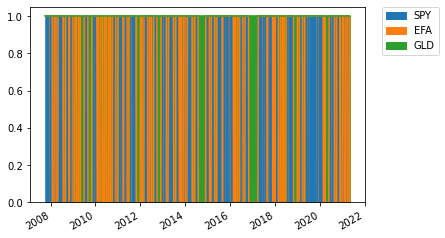

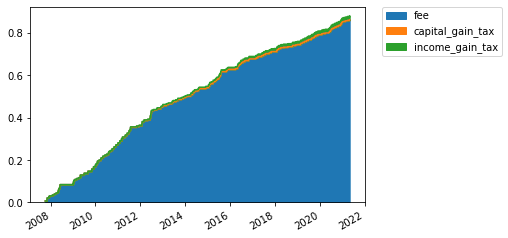

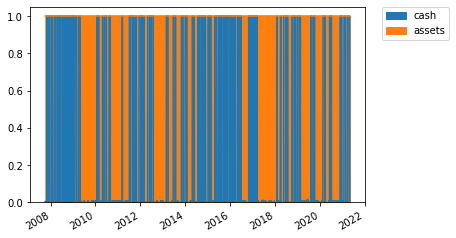

In [6]:
optimizer = RotationStrategy(risk_free_rate=0.02, do_re_optimize=True)
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, evacuator=MovingAverageEvacuator(span=150)),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
print(report.annual_summary())
ax = report.history_assets().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cost().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cash_vs_assets().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


If it is no fee.
-----------------

100%|██████████| 3416/3416 [00:23<00:00, 143.44it/s]


           tickers  yearly total return  sharpe ratio  max draw down  \
0  [SPY, EFA, GLD]             1.040388      0.162441       0.743349   

   max draw down span  
0                1643  
              return       std  sharpe ratio  draw down
2007-12-31 -0.079296  0.149276     -0.665184   0.920704
2008-12-31 -0.016826  0.087408     -0.421310   0.879190
2009-12-31  0.440252  0.184963      2.272084   0.845383
2010-12-31 -0.052568  0.153525     -0.472679   0.792885
2011-12-31 -0.134628  0.146924     -1.052440   0.801147
2012-12-31  0.125562  0.119210      0.885510   0.763317
2013-12-31  0.111948  0.109034      0.843300   0.891880
2014-12-31  0.039912  0.081680      0.243777   0.913412
2015-12-31 -0.101522  0.091351     -1.330271   0.855571
2016-12-31 -0.126527  0.132251     -1.107948   0.747318
2017-12-31  0.107165  0.069299      1.257812   0.743349
2018-12-31 -0.031004  0.108349     -0.470741   0.773666
2019-12-31  0.064498  0.116315      0.382564   0.769403
2020-12-31  0.262969  0

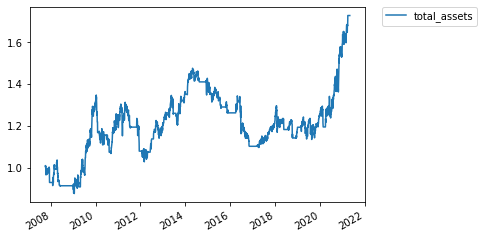

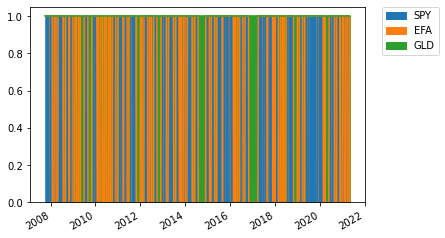

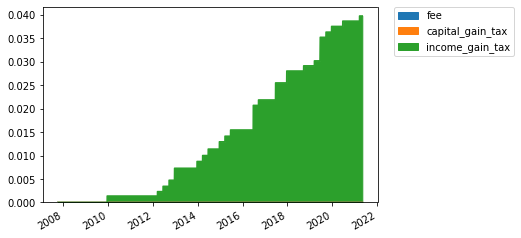

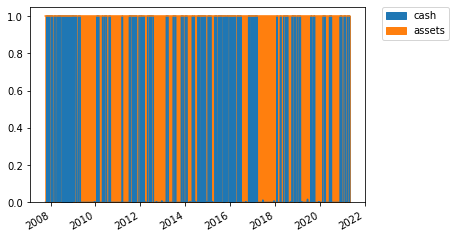

In [7]:
from mypo import Settings
from mypo.trigger import MonthlyTrigger

optimizer = RotationStrategy(risk_free_rate=0.02, do_re_optimize=True)
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, evacuator=MovingAverageEvacuator(span=150)),
    settings=Settings(tax_rate=np.float64(0.20), fee_rate=np.float64(0.00))
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
print(report.summary())
print(report.annual_summary())
ax = report.history_assets().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cost().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cash_vs_assets().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
